Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

READING DATA

In [4]:
df=pd.read_csv('AB_NYC_2019.csv')

In [161]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room,date,nh
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1,2018-10-19,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2,2019-05-21,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,NaT,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2,2019-07-05,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2,2018-11-19,2


In [13]:
df.shape

(48895, 16)

In [17]:
for i in df.columns:
    print(i,'->',df[i].dtypes)

id -> int64
name -> object
host_id -> int64
host_name -> object
neighbourhood_group -> object
neighbourhood -> object
latitude -> float64
longitude -> float64
room_type -> object
price -> int64
minimum_nights -> int64
number_of_reviews -> int64
last_review -> object
reviews_per_month -> float64
calculated_host_listings_count -> int64
availability_365 -> int64


TYPES OF NEIHBOURHOOD AND THEIR NUMBERS

In [23]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [103]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

In [38]:
print('mean rating of pvt room ->',df[df['room_type']=='Private room']['reviews_per_month'].mean())
print('mean rating of shared room ->',df[df['room_type']=='Shared room']['reviews_per_month'].mean())
print('mean rating of Entire home/apt room ->',df[df['room_type']=='Entire home/apt']['reviews_per_month'].mean())

mean rating of pvt room -> 1.4452091706764794
mean rating of shared room -> 1.4717257683215124
mean rating of Entire home/apt room -> 1.3065778083808826


In [39]:
print('mean price of pvt room ->',df[df['room_type']=='Private room']['price'].mean())
print('mean price of shared room ->',df[df['room_type']=='Shared room']['price'].mean())
print('mean price of Entire home/apt room ->',df[df['room_type']=='Entire home/apt']['price'].mean())

mean price of pvt room -> 89.78097285675894
mean price of shared room -> 70.12758620689655
mean price of Entire home/apt room -> 211.79424613325986


In [40]:
print('mean minimum_nights of pvt room ->',df[df['room_type']=='Private room']['minimum_nights'].mean())
print('mean minimum_nights of shared room ->',df[df['room_type']=='Shared room']['minimum_nights'].mean())
print('mean minimum_nights of Entire home/apt room ->',df[df['room_type']=='Entire home/apt']['minimum_nights'].mean())

mean minimum_nights of pvt room -> 5.377900206037803
mean minimum_nights of shared room -> 6.475
mean minimum_nights of Entire home/apt room -> 8.506907001456177


In [49]:
r=[]
for i in df['room_type']:
    if i=='Private room':
        r.append(1)
    elif i=='Shared room':
        r.append(0)
    else:
        r.append(2)
df['room']=r        

2    25409
1    22326
0     1160
Name: room, dtype: int64

# Price of shared app/ house are more

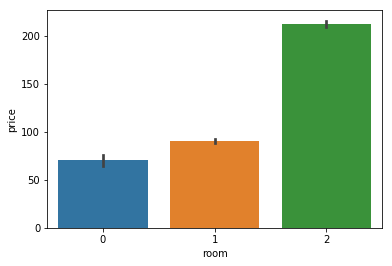

In [57]:
sns.barplot(y='price',x='room',data=df)

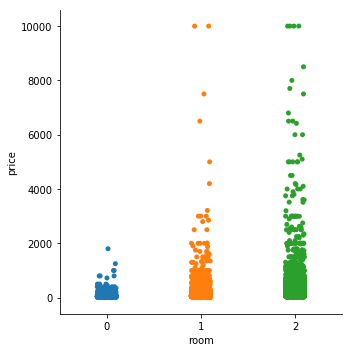

In [58]:
sns.catplot(y='price',x='room',data=df)

# STAY IN ROOMS ARE ROUGHLY DIRECTLY PROPORTIONAL TO THEIR TYPES

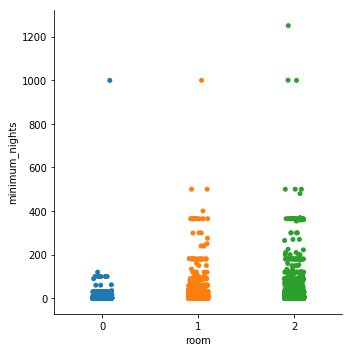

In [64]:
sns.catplot(y='minimum_nights',x='room',data=df)

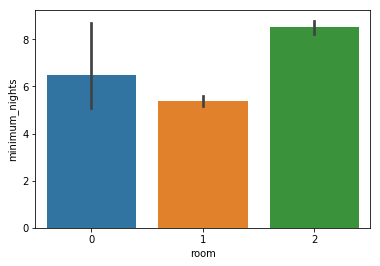

In [139]:
sns.barplot(y='minimum_nights',x='room',data=df)


# # INCLUDING AREAS

# let's see the graphs

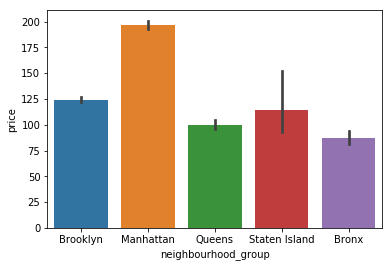

In [99]:
sns.barplot(y='price',x='neighbourhood_group',data=df)

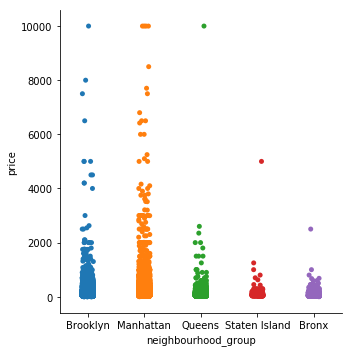

In [107]:
sns.catplot(y='price',x='neighbourhood_group',data=df)

In [162]:
df=df.fillna(0)

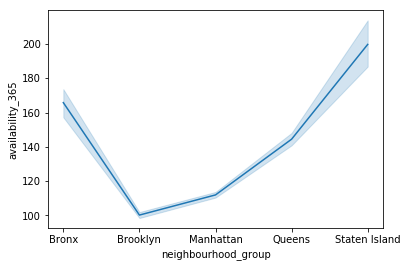

In [110]:
sns.lineplot(y='availability_365',x='neighbourhood_group',data=df)

In [117]:
df.neighbourhood_group.value_counts().reset_index(name='room')

,index,room
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


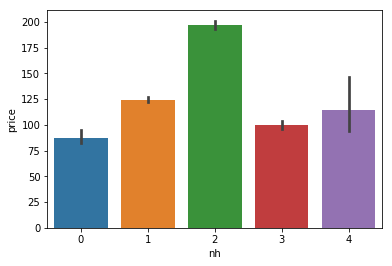

In [155]:
sns.barplot(x='nh',y='price',data=df)

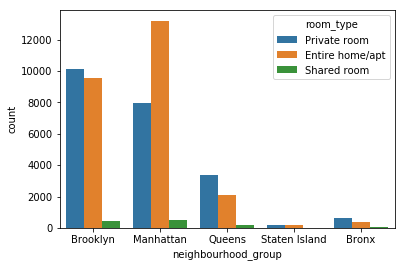

In [121]:
sns.countplot(x="neighbourhood_group", hue="room_type", data=df)

# CONCLUSION

#  1. MOST EARNING AREA IS MANHATTAN WITH HIGHEST OF ENTIRE APT

#  2. WITH LOW PRICE AND HIGH AVAILABILITY IN STATEN ISLAND IT'S NOT 
#      A FAVOURITE LOCATION FOR SOME REASON

#  3. FOR PRIVATE ROOM BROOKLYN SEEMS THE BEST BECAUSE OF THEIR           LEAST AVAILIBILITY AND HIGHER PRICES THAN MANHATTAN PVT                     ROOMS 


# GEOGRAPHICAL ANALYSIS

# REMOVING ROOMS OF EXTREME PRICES FOR A CLEAR VIEW

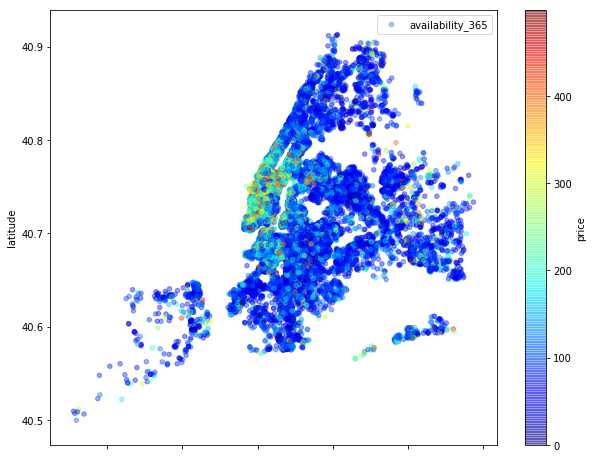

In [190]:
sub=df[df.price < 500]
v=sub.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
v.legend()

# CLEARLY QUEENS WITH LESS NUMBER OF ROOMS IS THE MOST      
#  EXPENSIVE

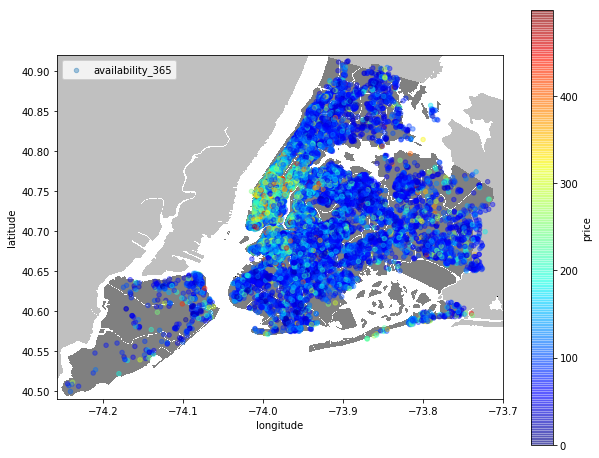

In [183]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()


# QUEENS HAS REASONABLY LARGE AMOUNT OF ENTIRE APT

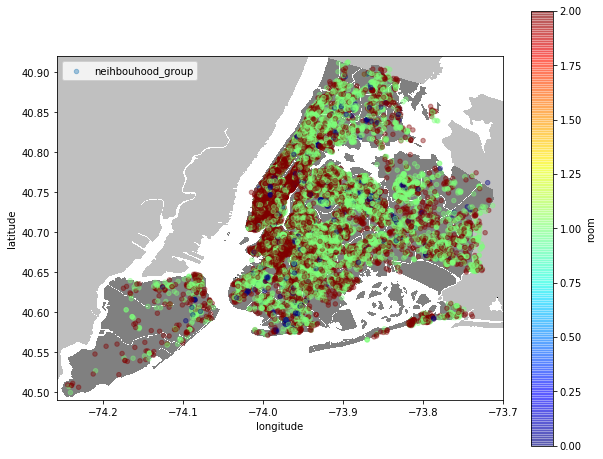

In [191]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub.plot(kind='scatter', x='longitude', y='latitude', label='neihbouhood_group', c='room', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()


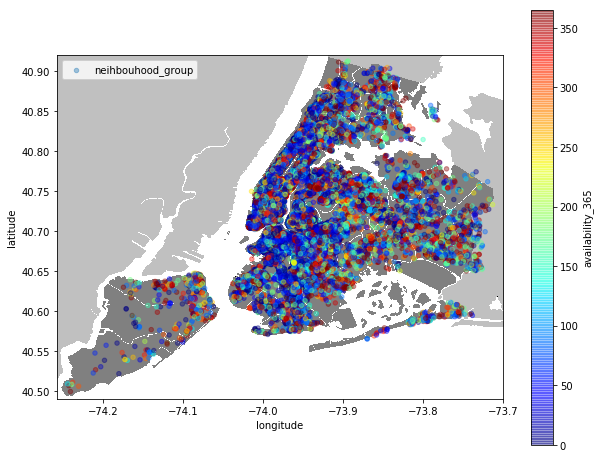

In [197]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude', label='neihbouhood_group', c='availability_365', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()


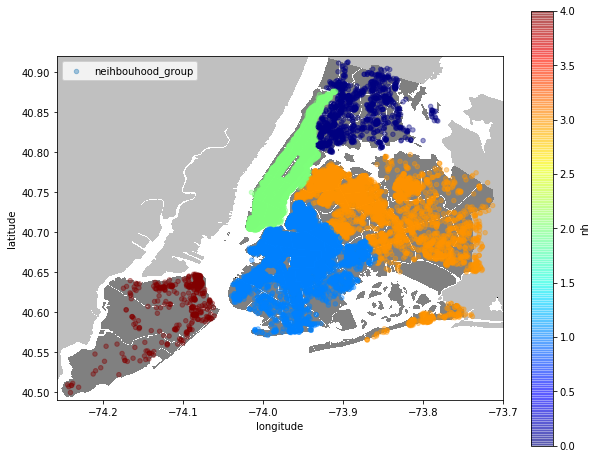

In [193]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude', label='neihbouhood_group', c='nh', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()


In [196]:
df['host_id'].value_counts().head()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

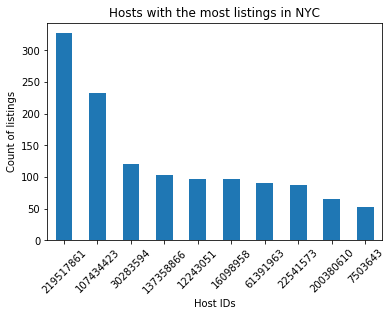

In [195]:
top_host=df.host_id.value_counts().head(10)
host=top_host.plot(kind='bar')
host.set_title('Hosts with the most listings in NYC')
host.set_ylabel('Count of listings')
host.set_xlabel('Host IDs')
host.set_xticklabels(viz_1.get_xticklabels(), rotation=45)